# Import libraries

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Generate a random sample

In [ ]:
def gensmallm(x_list: list, y_list: list, m: int):
    """
    gensmallm generates a random sample of size m along side its labels.

    :param x_list: a list of numpy arrays, one array for each one of the labels
    :param y_list: a list of the corresponding labels, in the same order as x_list
    :param m: the size of the sample
    :return: a tuple (X, y) where X contains the examples and y contains the labels
    """
    assert len(x_list) == len(y_list), 'The length of x_list and y_list should be equal'

    x = np.vstack(x_list)
    y = np.concatenate([y_list[j] * np.ones(x_list[j].shape[0]) for j in range(len(y_list))])

    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)

    rearranged_x = x[indices]
    rearranged_y = y[indices]

    return rearranged_x[:m], rearranged_y[:m]

# Naive Bayes algorithm

## Feed the Navie Bayes algorithm with data

In [ ]:
def bayeslearn(x_train: np.array, y_train: np.array):
    """
    :param x_train: 2D numpy array of size (m, d) containing the the training set. The training samples should be binarized
    :param y_train: numpy array of size (m, 1) containing the labels of the training set
    :return: a triple (allpos, ppos, pneg) the estimated conditional probabilities to use in the Bayes predictor
    """
    m, d = x_train.shape
    positive_cond_probability = np.zeros((d, 1))
    negative_cond_probability = np.zeros((d, 1))
    allpos = 0

    for i in range(m):
        if y_train[i] > 0:
            allpos += 1

        for j in range(d):
            if x_train[i, j] > 0:
                if y_train[i] > 0:
                    positive_cond_probability[j, 0] += 1
                else:
                    negative_cond_probability[j, 0] += 1

    ppos = positive_cond_probability / allpos
    pneg = negative_cond_probability / (m - allpos)
    allpos = (1/m) * allpos

    return allpos, ppos, pneg

## Predict labels

In [ ]:
def bayespredict(allpos: float, ppos: np.array, pneg: np.array, x_test: np.array):
    """
    :param allpos: scalar between 0 and 1, indicating the fraction of positive labels in the training sample
    :param ppos: numpy array of size (d, 1) containing the empirical plug-in estimate of the positive conditional probabilities
    :param pneg: numpy array of size (d, 1) containing the empirical plug-in estimate of the negative conditional probabilities
    :param x_test: numpy array of size (n, d) containing the test samples
    :return: numpy array of size (n, 1) containing the predicted labels of the test samples
    """
    n = x_test.shape[0]
    x_test[x_test == 0] = -1
    bayes_predict = []
    w0 = math.log(allpos / (1 - allpos))

    for i in range(n):
        probability_sum = w0 + weight_sum(ppos, pneg, x_test[i])
        bayes_predict.append(probability_sum)

    # (positive_probability - negative_probability) > 0 => y=1 else y=-1
    bayes_predict = np.sign(np.array([bayes_predict]).T)

    return bayes_predict

## Weights calculation

In [ ]:
def weight_sum(ppos: np.array, pneg: np.array, xi: np.array):
    d = xi.shape[0]
    w_sum = 0

    for i in range(d):
        probability = 0

        if xi[i] > 0:
            if pneg[i, 0] != 0:
                # P(X=1 | Y=1) / P(X=1 | Y=-1)
                probability = ppos[i, 0] / pneg[i, 0]
        else:
            if (1 - pneg[i, 0]) != 0:
                # P(X=-1 | Y=1) / P(X=-1 | Y=-1)
                probability = (1 - ppos[i, 0]) / (1 - pneg[i, 0])

        if probability != 0:
            w_sum += math.log(probability)

    return w_sum

# Naive Bayes algorithm testing

## Sanity test

In [ ]:
# Load sample data of digits 3 and 5
data = np.load('mnist_all.npz')

train3 = data['train3']
train5 = data['train5']

test3 = data['test3']
test5 = data['test5']

m = 500
n = 50
d = train3.shape[1]

x_train, y_train = gensmallm([train3, train5], [-1, 1], m)

x_test, y_test = gensmallm([test3, test5], [-1, 1], n)

# threshold the images (binarization)
threshold = 128
x_train = np.where(x_train > threshold, 1, 0)
x_test = np.where(x_test > threshold, 1, 0)

# run naive bayes algorithm
allpos, ppos, pneg = bayeslearn(x_train, y_train)

assert isinstance(ppos, np.ndarray) \
        and isinstance(pneg, np.ndarray), "ppos and pneg should be numpy arrays"

assert 0 <= allpos <= 1, "allpos should be a float between 0 and 1"

y_predict = bayespredict(allpos, ppos, pneg, x_test)

assert isinstance(y_predict, np.ndarray), "The output of the function bayespredict should be numpy arrays"
assert y_predict.shape == (n, 1), f"The output of bayespredict should be of size ({n}, 1)"

y_test = y_test.reshape(-1, 1)

print(f"Prediction error = {np.mean(y_test != y_predict)}")

Prediction error = 0.08


## Test the Naive Bayes error as a function of the sample size

Progress: 10.0% Completed
Progress: 20.0% Completed
Progress: 30.0% Completed
Progress: 40.0% Completed
Progress: 50.0% Completed
Progress: 60.0% Completed
Progress: 70.0% Completed
Progress: 80.0% Completed
Progress: 90.0% Completed
Progress: 100.0% Completed


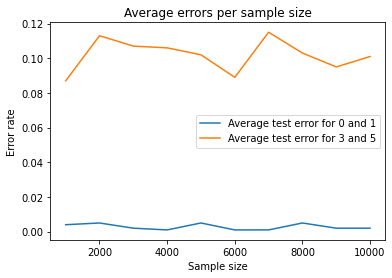

In [ ]:
data = np.load('mnist_all.npz')

train0 = data['train0']
train1 = data['train1']
train3 = data['train3']
train5 = data['train5']

test0 = data['test0']
test1 = data['test1']
test3 = data['test3']
test5 = data['test5']

n = 1000

errors_list1 = []
errors_list2 = []
sizes_list = []

for size in range(1000, 10001, 1000):
    # train and test sets for 0 and 1
    x_train1, y_train1 = gensmallm([train0, train1], [-1, 1], size)
    x_test1, y_test1 = gensmallm([test0, test1], [-1, 1], n)

    # train and test sets for 3 and 5
    x_train2, y_train2 = gensmallm([train3, train5], [-1, 1], size)
    x_test2, y_test2 = gensmallm([test3, test5], [-1, 1], n)

    # threshold the images (binarization)
    threshold = 128
    x_train1 = np.where(x_train1 > threshold, 1, 0)
    x_test1 = np.where(x_test1 > threshold, 1, 0)

    x_train2 = np.where(x_train2 > threshold, 1, 0)
    x_test2 = np.where(x_test2 > threshold, 1, 0)

    # run naive bayes algorithm
    allpos1, ppos1, pneg1 = bayeslearn(x_train1, y_train1)
    allpos2, ppos2, pneg2 = bayeslearn(x_train2, y_train2)

    # assert test for train and test sets for 0 and 1
    assert isinstance(ppos1, np.ndarray) \
        and isinstance(pneg1, np.ndarray), "ppos and pneg should be numpy arrays"
    assert 0 <= allpos1 <= 1, "allpos should be a float between 0 and 1"

    # assert test for train and test sets for 3 and 5
    assert isinstance(ppos2, np.ndarray) \
            and isinstance(pneg2, np.ndarray), "ppos and pneg should be numpy arrays"
    assert 0 <= allpos2 <= 1, "allpos should be a float between 0 and 1"

    y_predict1 = bayespredict(allpos1, ppos1, pneg1, x_test1)
    y_predict2 = bayespredict(allpos2, ppos2, pneg2, x_test2)

    # assert test for train and test sets for 0 and 1
    assert isinstance(y_predict1, np.ndarray), "The output of the function bayespredict should be numpy arrays"
    assert y_predict1.shape == (n, 1), f"The output of bayespredict should be of size ({n}, 1)"

    # assert test for train and test sets for 3 and 5
    assert isinstance(y_predict2, np.ndarray), "The output of the function bayespredict should be numpy arrays"
    assert y_predict2.shape == (n, 1), f"The output of bayespredict should be of size ({n}, 1)"

    y_test1 = y_test1.reshape(-1, 1)
    y_test2 = y_test2.reshape(-1, 1)

    sizes_list.append(size)
    errors_list1.append(np.mean(y_test1 != y_predict1))
    errors_list2.append(np.mean(y_test2 != y_predict2))
    print("Progress: " + str(size/100) + "% Completed")

plt.title("Average errors per sample size")
plt.errorbar(sizes_list, errors_list1, label='Average test error for 0 and 1')
plt.errorbar(sizes_list, errors_list2, label='Average test error for 3 and 5')
plt.xlabel('Sample size')
plt.ylabel('Error rate')
plt.legend()
plt.show()

## Generating heat map of digits 0 and 1

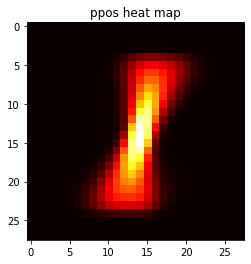

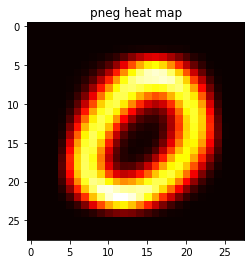

In [ ]:
data = np.load('mnist_all.npz')

train0 = data['train0']
train1 = data['train1']

x_train, y_train = gensmallm([train0, train1], [-1, 1], 10000)

# threshold the images (binarization)
threshold = 128
x_train = np.where(x_train > threshold, 1, 0)

# run naive bayes algorithm
allpos, ppos, pneg = bayeslearn(x_train, y_train)

ppos = np.reshape(ppos, (28, 28))
pneg = np.reshape(pneg, (28, 28))

plt.imshow(ppos, cmap='hot')
plt.title("ppos heat map")
plt.show()

plt.imshow(pneg, cmap='hot')
plt.title("pneg heat map")
plt.show()

## Checking the influance of the change in the sample labels distribution probability

In [ ]:
data = np.load('mnist_all.npz')

train0 = data['train0']
train1 = data['train1']
train3 = data['train3']
train5 = data['train5']

test0 = data['test0']
test1 = data['test1']
test3 = data['test3']
test5 = data['test5']

n = 1000

x_train1, y_train1 = gensmallm([train0, train1], [-1, 1], 10000)
x_test1, y_test1 = gensmallm([test0, test1], [-1, 1], n)

x_train2, y_train2 = gensmallm([train3, train5], [-1, 1], 10000)
x_test2, y_test2 = gensmallm([test3, test5], [-1, 1], n)

# threshold the images (binarization)
threshold = 128
x_train1 = np.where(x_train1 > threshold, 1, 0)
x_test1 = np.where(x_test1 > threshold, 1, 0)

x_train2 = np.where(x_train2 > threshold, 1, 0)
x_test2 = np.where(x_test2 > threshold, 1, 0)

# run naive bayes algorithm
allpos1, ppos1, pneg1 = bayeslearn(x_train1, y_train1)
allpos2, ppos2, pneg2 = bayeslearn(x_train2, y_train2)

print("Results for 0 and 1:")
print("Old allpos:", allpos1)
print("Current allpos:", 0.75)

y_predict_original = bayespredict(allpos1, ppos1, pneg1, x_test1)
y_predict_updated = bayespredict(0.75, ppos1, pneg1, x_test1)

changed_from_pos_to_neg = 0
changed_from_neg_to_pos = 0

for i in range(n):
    if y_predict_original[i, 0] == 1 and y_predict_updated[i, 0] == -1:
        changed_from_pos_to_neg += 1
    if y_predict_original[i, 0] == -1 and y_predict_updated[i, 0] == 1:
        changed_from_neg_to_pos += 1

changed_from_pos_to_neg = changed_from_pos_to_neg / n
changed_from_neg_to_pos = changed_from_neg_to_pos / n

print("Percent of test labels changed from '1' to '-1':", changed_from_pos_to_neg)
print("Percent of test labels changed from '-1' to '1':", changed_from_neg_to_pos)

print("Results for 3 and 5:")
print("Old allpos:", allpos2)
print("Current allpos:", 0.75)

y_predict_original = bayespredict(allpos2, ppos2, pneg2, x_test2)
y_predict_updated = bayespredict(0.75, ppos2, pneg2, x_test2)

changed_from_pos_to_neg = 0
changed_from_neg_to_pos = 0

for i in range(n):
    if y_predict_original[i, 0] == 1 and y_predict_updated[i, 0] == -1:
        changed_from_pos_to_neg += 1
    if y_predict_original[i, 0] == -1 and y_predict_updated[i, 0] == 1:
        changed_from_neg_to_pos += 1

changed_from_pos_to_neg = changed_from_pos_to_neg / n
changed_from_neg_to_pos = changed_from_neg_to_pos / n

print("Percent of test labels changed from '1' to '-1':", changed_from_pos_to_neg)
print("Percent of test labels changed from '-1' to '1':", changed_from_neg_to_pos)

Results for 0 and 1:
Old allpos: 0.5344
Current allpos: 0.75
Percent of test labels changed from '1' to '-1': 0.0
Percent of test labels changed from '-1' to '1': 0.0
Results for 3 and 5:
Old allpos: 0.4692
Current allpos: 0.75
Percent of test labels changed from '1' to '-1': 0.0
Percent of test labels changed from '-1' to '1': 0.009
